In [1]:
import os
os.chdir(r'/Users/rmccrickerd/desktop/jdheston')

In [2]:
import numpy as np
import pandas as pd
from jdheston import jdheston as jdh
from jdheston import utils as uts
from jdheston import config as cfg
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.special import gamma
# import mpl
# %matplotlib inline

In [3]:
nx = np.newaxis
cfg.config(scale=1.5,print_keys=False)

In [4]:
df = pd.read_excel('data/ccy-date.xlsx')
df

,GBP,USD,Unnamed: 2,Bloomberg BGN,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,ATM,NaN,25D Call GBP,NaN,25D Put GBP,NaN,10D Call GBP,NaN,10D Put GBP,NaN
1,NaN,Mid,Spread,Mid,Spread,Mid,Spread,Mid,Spread,Mid,Spread
2,1M,6.27,0.7,6.41,0.88,6.64,0.88,6.848,1.599,7.283,1.598
3,3M,6.99,0.7,6.93,0.88,7.692,0.879,7.266,1.598,8.687,1.596
4,6M,8.885,0.75,8.514,0.942,10.147,0.942,8.671,1.711,11.685,1.708
5,1Y,9.61,0.65,9.209,0.816,10.936,0.816,9.355,1.481,12.565,1.48


In [5]:
deltas = np.array([0.1,0.25,0.5,0.75,0.9])
expiries = np.array([1/12,3/12,6/12,1])
labels = ['1m','3m','6m','1y']

In [6]:
m,n = len(expiries),len(deltas)
mid_vols = np.zeros((m,n))
spreads = np.zeros((m,n))

In [7]:
mid_vols[:,0] = df.iloc[2:,9]
mid_vols[:,1] = df.iloc[2:,5]
mid_vols[:,2] = df.iloc[2:,1]
mid_vols[:,3] = df.iloc[2:,3]
mid_vols[:,4] = df.iloc[2:,7]

In [8]:
spreads[:,0] = df.iloc[2:,10]
spreads[:,1] = df.iloc[2:,6]
spreads[:,2] = df.iloc[2:,2]
spreads[:,3] = df.iloc[2:,4]
spreads[:,4] = df.iloc[2:,8]

In [10]:
plt.rcParams['figure.figsize'] = [4,8]
plt.rcParams['legend.loc'] = 'lower left'

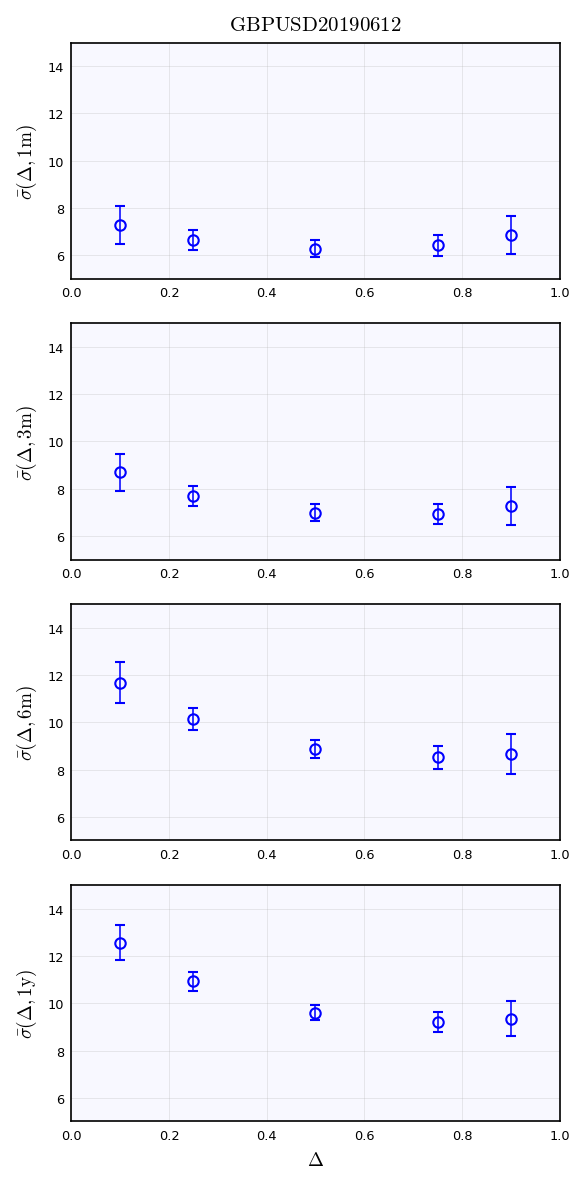

In [18]:
plot,axes = plt.subplots(m)
# n = -1
for i in range(4):
#         n += 1
        axes[i].plot(deltas, mid_vols[i,:],'bo')
        
        for j in range(n):
            axes[i].plot([deltas[j],deltas[j]], [mid_vols[i,j] - spreads[i,j]/2,mid_vols[i,j] + spreads[i,j]/2],'b')
        axes[i].plot(deltas, mid_vols[i,:] + spreads[i,:]/2,'b_')
        axes[i].plot(deltas, mid_vols[i,:] - spreads[i,:]/2,'b_')
#         axes[i].plot(k[n,:],100*BSV[n,:])
        axes[i].set_ylabel(r'$\bar{\sigma}(\Delta,\mathrm{%s})$'%labels[i])
        axes[i].set_ylim([5,15])
        axes[i].set_xlim([0,1])
# axes[0,1].set_title(r'$\varepsilon=\mathrm{%s}.$'%TS)
# axes[0,1].set_title(r'$H = 0.05,\ \ \varepsilon=\mathrm{%s}.$'%TS)
# axes[1,1].legend([r'$\ \ \mathrm{rHeston}$',r'$\mathrm{qhrHeston\ (NIG)}$'])
axes[0].set_title(r'$\mathrm{GBPUSD 20190612}$')
axes[3].set_xlabel(r'$\Delta$')
plt.tight_layout()
# fname = r'LSR-comparison'
# plt.savefig(fname)

In [22]:
vols = mid_vols/100

In [23]:
vol_surface = jdh.vol_surface(expiries[:,nx], deltas[nx,:], vols)

In [24]:
vol_surface.fit_jheston()

,sigma,rho,vee,rmse
0.083333,0.067833,-0.069881,0.256945,0.000115
0.250000,0.076496,-0.198750,0.475355,0.000167
0.500000,0.098074,-0.326596,0.681361,0.000342
1.000000,0.105711,-0.319487,0.942096,0.000337


In [28]:
sigma_max = np.max(vol_surface.jheston['sigma'])
sigma_max

0.10571070956254527

In [29]:
T = np.array([1/12,3/12,6/12,1])[:,nx]
# M = ['1W','1M','3M','6M','9M','1Y']
Δ = np.linspace(5,95,19)[nx,:]/100
k = norm.ppf(Δ)*sigma_max*np.sqrt(T)

In [30]:
pd.DataFrame(k,index=T[:,0],columns=np.round(Δ[0,:],2))

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0.083333,-0.050194,-0.039108,-0.031628,-0.025683,-0.020583,-0.016003,-0.011758,-0.007731,-0.003835,0.0,0.003835,0.007731,0.011758,0.016003,0.020583,0.025683,0.031628,0.039108,0.050194
0.250000,-0.086939,-0.067737,-0.054781,-0.044484,-0.035650,-0.027717,-0.020366,-0.013391,-0.006642,0.0,0.006642,0.013391,0.020366,0.027717,0.035650,0.044484,0.054781,0.067737,0.086939
0.500000,-0.122951,-0.095794,-0.077472,-0.062910,-0.050417,-0.039198,-0.028802,-0.018937,-0.009393,0.0,0.009393,0.018937,0.028802,0.039198,0.050417,0.062910,0.077472,0.095794,0.122951
1.000000,-0.173879,-0.135474,-0.109562,-0.088968,-0.071301,-0.055435,-0.040732,-0.026782,-0.013284,0.0,0.013284,0.026782,0.040732,0.055435,0.071301,0.088968,0.109562,0.135474,0.173879


In [134]:
vol_surface.jheston

,sigma,rho,vee,rmse
0.083333,0.067833,-0.069881,0.256945,0.000115
0.250000,0.076496,-0.198750,0.475355,0.000167
0.500000,0.098074,-0.326596,0.681361,0.000342
1.000000,0.105711,-0.319487,0.942096,0.000337


In [161]:
sigma = np.array(vol_surface.jheston['sigma'])
sigma

array([0.06783253, 0.07649616, 0.09807441, 0.10571071])

In [163]:
average_vols = np.array(vol_surface.jheston['sigma'].copy())
forward_vols = average_vols.copy()
for i in np.arange(1,m):
    forward_vols[i] = np.sqrt((average_vols[i]**2*T[i,0] - average_vols[i-1]**2*T[i-1,0])/(T[i,0] - T[i-1,0]))

In [170]:
forward_vols

array([0.06783253, 0.08047899, 0.11569579, 0.11283137])

In [597]:
# jump fit
# jump_weight = 0.99
# rho = -0.35
# vee =  1.0

In [598]:
# diffusion fit
# jump_weight = 0.01
# rho = -0.35
# vee =  2.5

In [616]:
# jump-diffusion fit
jump_weight = 0.5
rho = -0.35
vee =  1.75

In [617]:
jump_sigma = jump_weight**0.5*forward_vols
diff_sigma = (1 - jump_weight)**0.5*forward_vols
jump_sigma, diff_sigma

(array([0.04796484, 0.05690724, 0.08180928, 0.07978383]),
 array([0.04796484, 0.05690724, 0.08180928, 0.07978383]))

In [664]:
times1   = np.array([0,1/12,3/12,6/12])
sigma1   = jump_sigma
rho1     = np.array([ +0.5])*np.ones_like(times1)
vee1     = np.array([1.0])*np.ones_like(times1)
epsilon1 = np.array([ 0])*np.ones_like(times1)

In [665]:
times2   = np.array([0,1/12,3/12,6/12])
sigma2   = diff_sigma
rho2     = np.array([-0.9])*np.ones_like(times2)
vee2     = np.array([2.5])*np.ones_like(times2)
epsilon2 = np.array([1])*np.ones_like(times2)

In [666]:
params1  = np.array([times1, sigma1, rho1, vee1, epsilon1]).T
params2  = np.array([times2, sigma2, rho2, vee2, epsilon2]).T

In [667]:
np.round(params1,3)

array([[0.   , 0.048, 0.5  , 1.   , 0.   ],
       [0.083, 0.057, 0.5  , 1.   , 0.   ],
       [0.25 , 0.082, 0.5  , 1.   , 0.   ],
       [0.5  , 0.08 , 0.5  , 1.   , 0.   ]])

In [668]:
np.round(params2,3)

array([[ 0.   ,  0.048, -0.9  ,  2.5  ,  1.   ],
       [ 0.083,  0.057, -0.9  ,  2.5  ,  1.   ],
       [ 0.25 ,  0.082, -0.9  ,  2.5  ,  1.   ],
       [ 0.5  ,  0.08 , -0.9  ,  2.5  ,  1.   ]])

In [669]:
maturities = T
logstrikes = k

In [670]:
# call_prices = jdh.jdh_pricer(maturities, logstrikes, params1)
call_prices = jdh.jdh2f_pricer(maturities, logstrikes, [params1, params2])

In [671]:
implied_vols = jdh.surface(maturities, logstrikes, call_prices)

In [672]:
pd.DataFrame(implied_vols,index=T[:,0],columns=Δ[0,:])

,0.02658027839220203,0.048346326787544795,0.07588391230670265,0.11076226787214188,0.15405838308272868,0.20650221880810687,0.26839291263128506,0.33943349124098476,0.4185168499206612,0.5034990761821789,0.591037958381496,0.6766505097513187,0.7552219625926759,0.8221394515649528,0.8747948380000904,0.9135345487478235,0.9411668001108989,0.9613816521330141,0.9775508357901938
0.083333,0.077258,0.072559,0.069565,0.067272,0.065367,0.063716,0.062256,0.060965,0.059853,0.058969,0.058420,0.058406,0.059270,0.061478,0.065363,0.070810,0.077597,0.086082,0.098161
0.250000,0.088169,0.083697,0.080572,0.078038,0.075844,0.073881,0.072100,0.070490,0.069073,0.067922,0.067174,0.067059,0.067872,0.069861,0.073069,0.077397,0.082846,0.089813,0.099917
0.500000,0.109115,0.104169,0.100777,0.098081,0.095798,0.093810,0.092062,0.090540,0.089260,0.088266,0.087633,0.087466,0.087893,0.089046,0.091046,0.094003,0.098090,0.103745,0.112483
1.000000,0.121138,0.114414,0.109804,0.106177,0.103167,0.100622,0.098477,0.096712,0.095334,0.094366,0.093843,0.093800,0.094274,0.095299,0.096919,0.099213,0.102342,0.106707,0.113590


In [673]:
# plt.rcParams['figure.figsize'] = [2*1.618*2,2*3]
# plt.rcParams['legend.loc'] = 'lower left'

In [674]:
plt.rcParams['figure.figsize'] = [3,3*9/16]

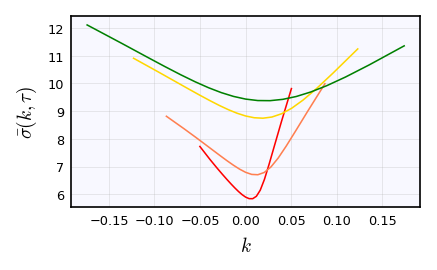

In [675]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*implied_vols[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')
# plt.savefig('temp')

In [676]:
implied_vars = implied_vols*np.sqrt(T)
Δ = norm.cdf(k/implied_vars + 0.5*implied_vars)

In [677]:
plt.rcParams['figure.figsize'] = [4,8]
plt.rcParams['legend.loc'] = 'upper right'

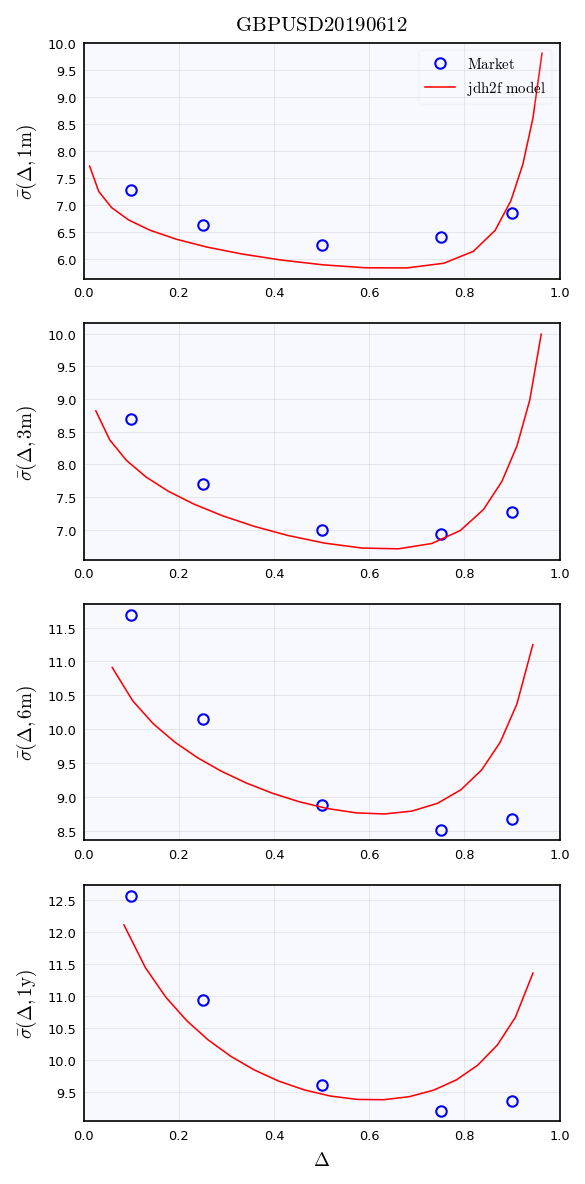

In [678]:
plot,axes = plt.subplots(m)
for i in range(len(T[:,0])):
    axes[i].plot(deltas, mid_vols[i,:],'bo')
    axes[i].plot(Δ[i,:],100*implied_vols[i,:])
    axes[i].set_xlim([0,1])
    axes[i].set_ylabel(r'$\bar{\sigma}(\Delta,\mathrm{%s})$'%labels[i])
axes[0].set_title(r'$\mathrm{GBPUSD 20190612}$')
axes[0].legend([r'$\mathrm{Market}$',r'$\mathrm{jdh2f\ model}$'])
axes[-1].set_xlabel(r'$\Delta$')
plt.tight_layout()
plt.savefig('plots/jump-diffusion-fit')